# Introduction to Thermodynamics and Statistical Physics

In this lecture, we are going to continue introducing some topics which are needed to fully explore thermal physics. In particular, we'll cover:

* Thermal Equilibrium and the Zeroth Law of Thermodynamics
* Thermometers
* Microstates versus macrostates
* Temperature
* Ensembles
* Boltzmann distribution

## Thermal equilibrium

What exactly is temperature? Qualitatively, it is how hot or cold an object is, but this is of course subjective. If we have two bodies, and we know that one with temperature $T_1$ is hotter than one with temperature $T_2$, then we know that $T_1>T_2$.

![Thermal Equilibrium](Figures/Thermal_Equilibrium.png)

Furthermore, we know that if we bring two bodies into thermal contact with each other, heating (energy in transit) will occur between bodies (shown in b above), and they'll eventually end up with a temperature $T_1>T_{\rm f}>T_2$ (c). When this is achieved, and there is no net flow between the bodies, they are in **thermal equilibrium**.

This process is not reversible. That is, if we have two objects in thermal contact, and they are in thermal equilibrium, we would never expect them to spontaneously to undergo a flow of energy that goes from (c) back to (a). So, this means as a function of time, bodies tend towards thermal equilibrium.

Realising this, and also then that if multiple bodies are in thermal equilibrium with each other, then all bodies must be at the same temperature leads us to the Zeroth law of thermodynamics.

**Zeroth Law of Thermodynamics**

Two systems, each separately in thermal equilibrium with a third, are in equilibrium with each other.

### Application of the Zeroth Law: Thermometers
Imagine now we want to measure the temperature of an system. If we bring that system into thermal contact with a device whose thermal properties we know, and wait for them to reach thermal equilibrium, then we know the temperature of the first system. 

Such devices are called thermometers, and they come in various types:

* Liquid thermometers, where the corresponding change in volume of the liquid gives us a change in temperature.
* Electric thermometers, where the electrical resistance of the device changes with temperature.

The problem with these sorts of thermometers is that their properties (volume, resistance) only depend linearly on temperature within limit temperature ranges (at high temperatures, electrical thermometers melt while liquid thermometers boil for example). So they can't be used to give an absolute definition of temperature which is grounded in fundamental physics. To get this, we are going to need some statistical arguments.

## Microstates versus Macrostates

Imagine we have some  dipoles in a magnetic field. Each dipole contributes an interaction energy of $- \mu \cdot B$. Quantum mechanics tells us that there are only specific orientations of the dipole in the magnetic field allowed. This is simplest when the dipoles possess angular momentum of $\hbar/2$, which is referred to as "spin 1/2".

The dipoles can thus line up in one of two directions: parallel, or anti-parallel to the magnetic field. This leads to an interaction energy of $\mp \mu B$ per dipole. Imagine now we have $N$ dipoles. If $n$ are oriented parallel to the field, then $(N-n)$ must be anti-parallel. Thus, the total energy of the system is given by:

$$
    E(n) = n(-\mu B)+(N-n)(\mu B) = (N-2n)\mu B
$$

This means that if we have $N=9$, and $n=7$, we would have an interaction energy of $-6\mu B$. So why is this interesting?

Well, consider examples A and B below. The both have two dipoles which are oriented anti-parallel to the magnetic field, while the other 7 are all in alignment. From a microscopic point of view, the two scenarios are different, as the individual atoms which are anti-parallel are different in both cases. However, from a macroscopic point of view, the interaction energy of both with the magnetic field (which is what we can measure) are the same. These means that a **given macrostate can be described by a large number of equally likely of microstates**.

![B_field_dipoles](Figures/B_Field_Dipoles.png)

For the above example, there are $2^N$ microstates. The number of microstates which can give the same interaction energy $E(n)$ is
$$
    \Omega(n) = \frac{N!}{n!(N-n)!}
$$
This is referred to as the statistical weight. It's worth considering exactly what it means - see Section 1.4 of Blundell & Blundell for a more robust discussion of where this term comes from. For the moment, the below plot shows the statistical weight for our above toy problem, where we vary n.

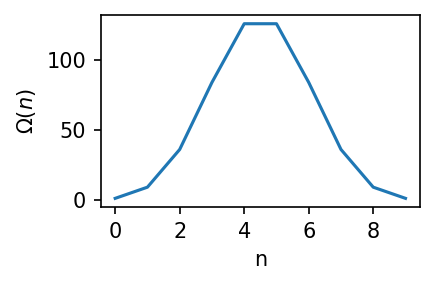

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def stat_weight(n,N):
    return np.math.factorial(int(N))/(np.math.factorial(n)*np.math.factorial(int(N-n)))

N = 9.0
n = np.arange(0,9.1,1)
omega = np.zeros_like(n)
for i in n:
    omega[int(i)] = stat_weight(i,N)
plt.figure(figsize=[3,2],dpi=150)
plt.plot(n,omega)
plt.xlabel("n")
plt.ylabel("$\Omega (n)$")
plt.tight_layout()
plt.savefig("Figures/Stat_weight.png")
plt.show()

What this shows us is that the statistical weight is highest for when $n$ is between 4 and 5. This should make sense as this is when half of the dipoles are oriented parallel to the B field, and half anti-parallel, and so we have the most freedom with placing them in the grid. This also means that the macrostate given by $n=4/5$ is the most probable state to occur, as these macrostates have the largest number of microstates.

## Temperature

We can now use the above expresssion for statistical weight to arrive at a defintion of the temperature of an object. First, let's consider 2 bodies which are in thermal contact.

![Stat_Weight](Figures/Temperature_Statistical_Weight.png)

For the following, we are going to assume that this is a closed system (that is, we're not losing any energy to the surroundings) and so, at all times, the total energy of the system is given by $E=E_1+E_2$. As such, all we need to do is specify $E_1$ and the macrostate of the system will be determined. 
The first system can be in any one of $\Omega_1(E_1)$ microstates and the second system can be in any one of $\Omega_2(E_2)$ microstates. Thus, the system as a whole can be in any number of $\Omega_1(E_1) \Omega_2(E_2)$ microstates.

Now, if we let the system reach thermal equilibrium, then the system will appear to be in the macrostate which maximises the number of microstates (consider the above graph to convince yourself of this). As such, the most probable division of energy between the two systems is the one which maximises $\Omega_1(E_1) \Omega_2(E_2)$. So we end up with
$$
\frac{{\rm d}}{{\rm d}E_1} \left(\Omega_1(E_1) \Omega_2(E_2)\right) = 0
$$
This gives
$$
\Omega_2(E_2) \frac{{\rm d} \Omega_1(E_1) }{{\rm d}E_1} + \Omega_1(E_1) \frac{{\rm d} \Omega_2(E_2) }{{\rm d}E_2} \frac{{\rm d} E_2 }{{\rm d}E_1} = 0
$$
Now recalling that $E=E_1+E_2$ and is fixed gives ${\rm d}E_1=-{\rm d}E_2$, which in turn gives $\frac{{\rm d}E_1}{{\rm d}E_2}=-1$. This simplifies our above expression to
$$
\frac{1}{\Omega_1} \frac{{\rm d} \Omega_1}{{\rm d} E_1} - \frac{1}{\Omega_2} \frac{{\rm d} \Omega_2}{{\rm d} E_2} = 0
$$
from which we get
$$
    \frac{{\rm d ln} \Omega_1}{{\rm d} E_1} = \frac{{\rm d ln} \Omega_2}{{\rm d} E_2}
$$
This condition defines the most likely division of energy between the objects which we would call "being at the same temperature". As such, we can now define
$$
    \frac{1}{k_{\rm B}T} = \frac{{\rm d ln} \Omega}{{\rm d} E}
$$
where the choice of $k_{\rm B}T$ will be motivated later.

## Ensembles

In order to make use of this definition for temperature, we are going to use an ensemble. The motivation for this is that we will imagine a system whos properties we measure by conducting repeated identical experiments on, such that we can average over variations due to the systems microscopic properties. There are three main types of ensembles we shall encounter in our studies:

* **The microcanonical ensemble**: an ensemble of systems that all have the same fixed energy.
* **The canonical ensemble**: an ensemble of systems, each of which can exchange energy freely with a large reservoir of energy.
* **The grand canonical ensemble**: an ensemble of systems, each of which can exchange energy and particles freely with a large reservoir.